In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nearset_neighbours import NearestNeighbours
import sklearn.datasets
import utils

Dataset

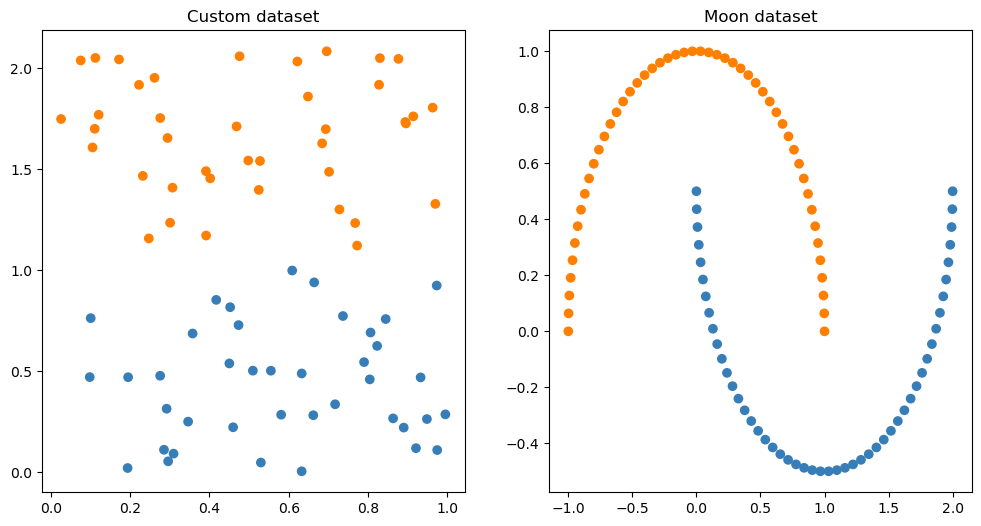

In [2]:
figure = plt.figure(figsize=(12,6))
colors = np.array(['#ff7f00', '#377eb8'])

X, y = utils.create_dataset()
xbounds = (X[:,0].min(), X[:,0].max())
ybounds = (X[:,1].min(), X[:,1].max())
ax = plt.subplot(1,2,1)
ax.scatter(X[:, 0], X[:, 1], c=colors[y.astype(int)])
ax.set_title("Custom dataset")
X, y = sklearn.datasets.make_moons(100)
xbounds = (X[:,0].min(), X[:,0].max())
ybounds = (X[:,1].min(), X[:,1].max())
ax = plt.subplot(1,2,2)
ax.scatter(X[:, 0], X[:, 1], c=colors[y.astype(int)])
ax.set_title("Moon dataset")
plt.show()

k-Nearest Neighbours

In [3]:
def k_nearest(k, colors = np.array(['#ff7f00', '#377eb8'])):
    X, y = utils.create_dataset()
    xbounds = (X[:,0].min(), X[:,0].max())
    ybounds = (X[:,1].min(), X[:,1].max())
    model = NearestNeighbours(k=k)
    model.fit(X, y)

    figure = plt.figure(figsize=(12,6))
    ax = plt.subplot(1,2,1)
    ax.scatter(X[:, 0], X[:, 1], c=colors[y.astype(int)])
    ax.set_title("k-Nearest Neighbours - k = %d" % model.k)
    utils.decision_boundary(ax, xbounds, ybounds, colors, model, 100)

    X, y = sklearn.datasets.make_moons(100)
    xbounds = (X[:,0].min(), X[:,0].max())
    ybounds = (X[:,1].min(), X[:,1].max())
    model = NearestNeighbours(k=k)
    model.fit(X, y)
    ax = plt.subplot(1,2,2)
    ax.scatter(X[:, 0], X[:, 1], c=colors[y.astype(int)])
    ax.set_title("k-Nearest Neighbours - k = %d" % model.k)
    utils.decision_boundary(ax, xbounds, ybounds, colors, model, 100)
    plt.show()

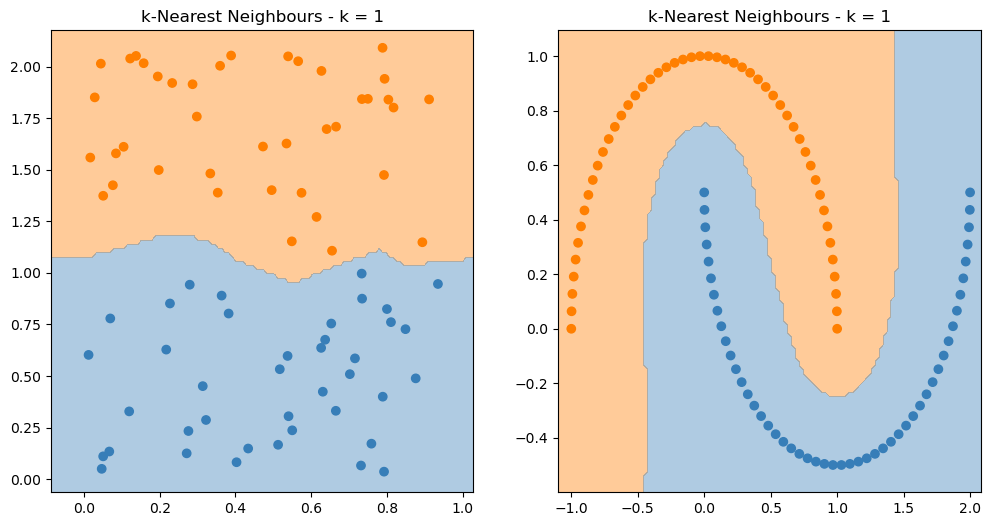

In [4]:
k_nearest(1)

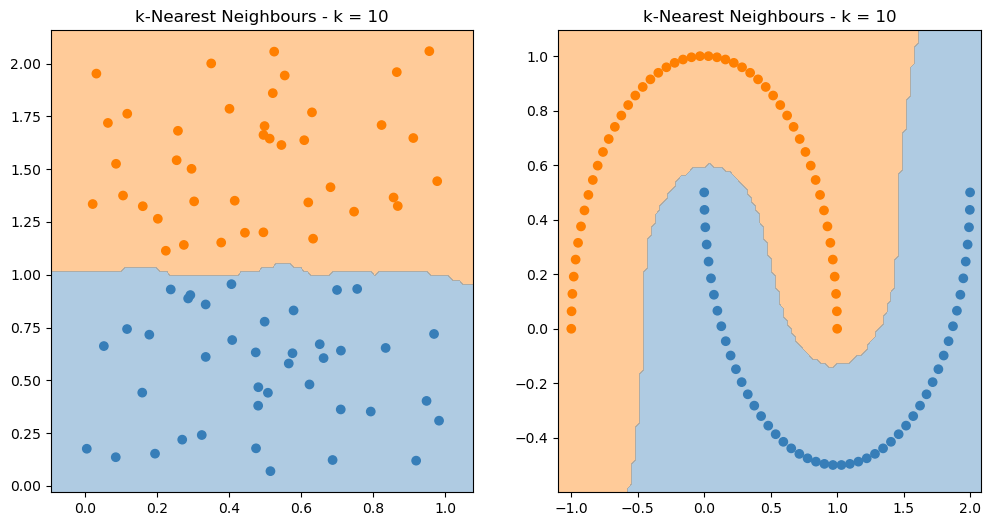

In [5]:
k_nearest(10)

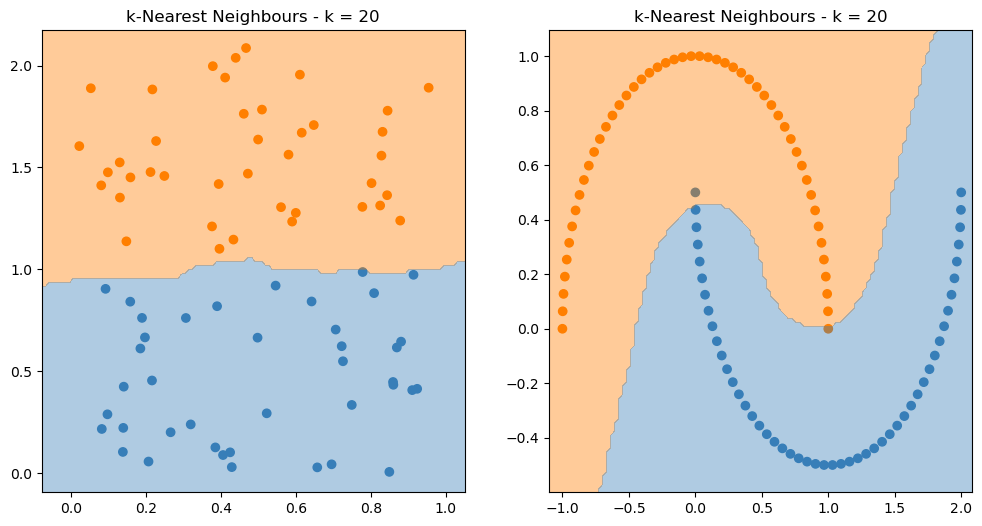

In [6]:
k_nearest(20)

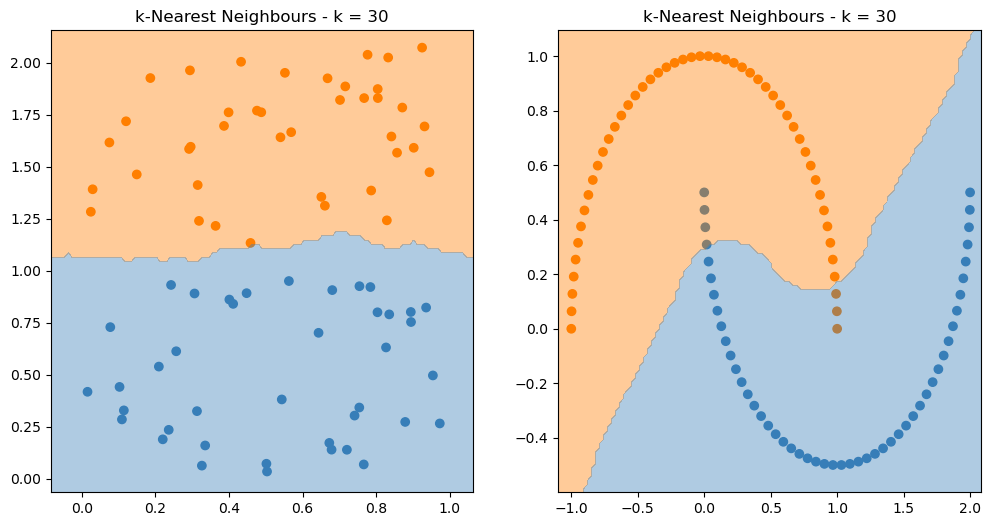

In [7]:
k_nearest(30)

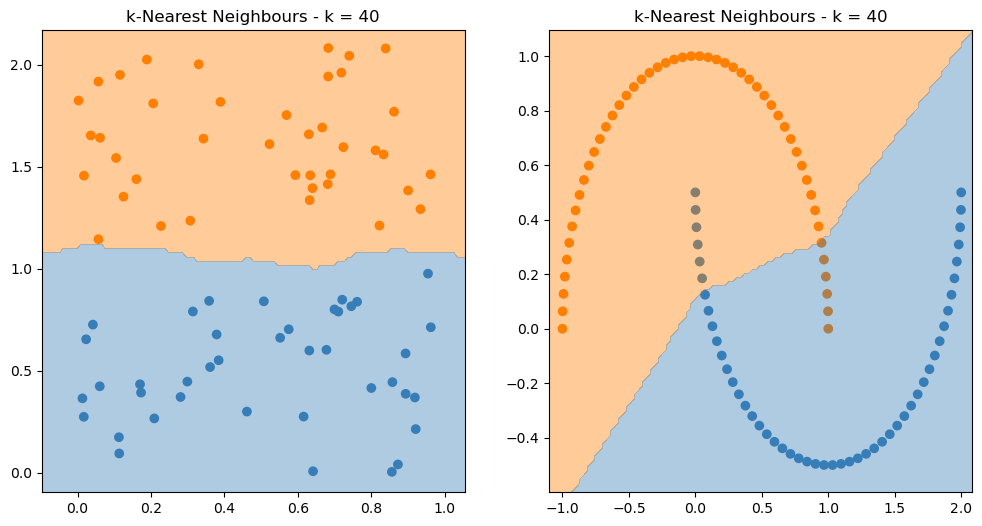

In [8]:
k_nearest(40)

Nearest Neighbours with Gaussian Kernel method

In [9]:
def kernel_method(sigma, colors = np.array(['#ff7f00', '#377eb8'])):
    X, y = utils.create_dataset()
    xbounds = (X[:,0].min(), X[:,0].max())
    ybounds = (X[:,1].min(), X[:,1].max())
    model_with_kernel = NearestNeighbours(gaussian_kernel=True, sigma=sigma)
    model_with_kernel.fit(X, y)
    figure = plt.figure(figsize=(12,6))
    ax = plt.subplot(1,2,1)
    ax.scatter(X[:, 0], X[:, 1], c=colors[y.astype(int)])
    ax.scatter(X[:, 0], X[:, 1], c=colors[y.astype(int)])
    ax.set_title(r"Nearest Neighbours - $\sigma = %s$" % model_with_kernel.sigma)
    utils.decision_boundary(ax, xbounds, ybounds, colors, model_with_kernel, 100)

    X, y = sklearn.datasets.make_moons(100)
    xbounds = (X[:,0].min(), X[:,0].max())
    ybounds = (X[:,1].min(), X[:,1].max())
    model_with_kernel = NearestNeighbours(gaussian_kernel=True, sigma=sigma)
    model_with_kernel.fit(X, y)
    ax = plt.subplot(1,2,2)
    ax.scatter(X[:, 0], X[:, 1], c=colors[y.astype(int)])
    ax.scatter(X[:, 0], X[:, 1], c=colors[y.astype(int)])
    ax.set_title(r"Nearest Neighbours - $\sigma = %s$" % model_with_kernel.sigma)
    utils.decision_boundary(ax, xbounds, ybounds, colors, model_with_kernel, 100)
    plt.show()

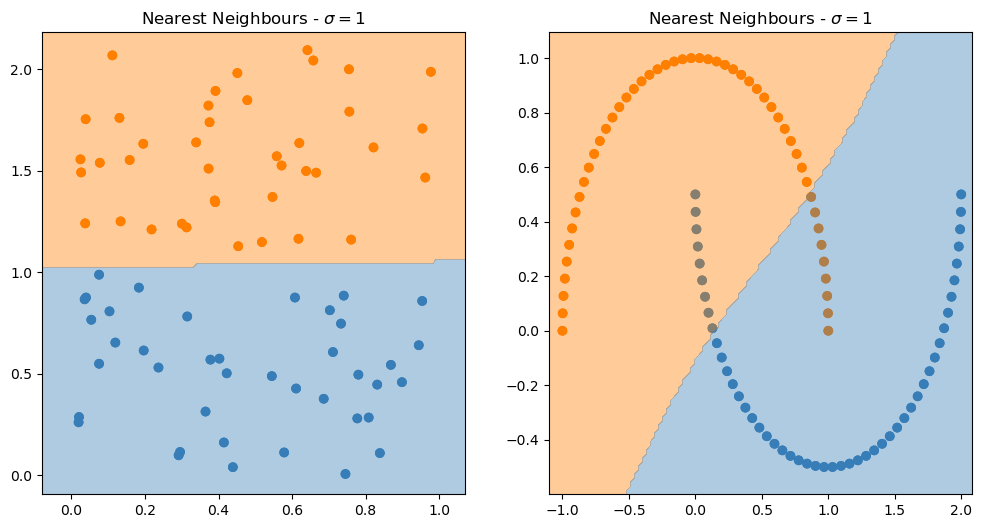

In [10]:
kernel_method(1)

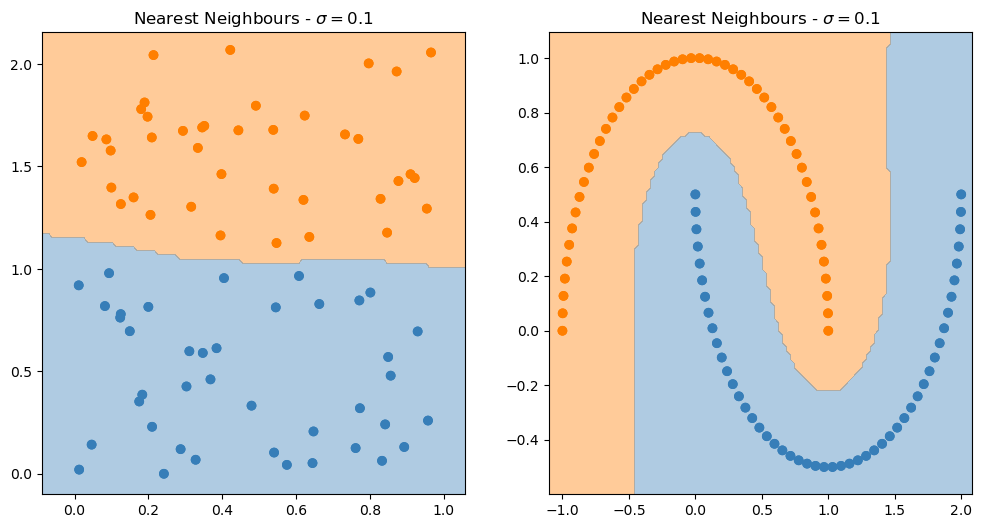

In [11]:
kernel_method(0.1)

/home/malick/Desktop/projects/14-machine-learning-grind/01-machine-learning/08-nearest-neighbours/nearset_neighbours.py:23: RuntimeWarning: invalid value encountered in scalar divide
  return W@self.y / W.sum()


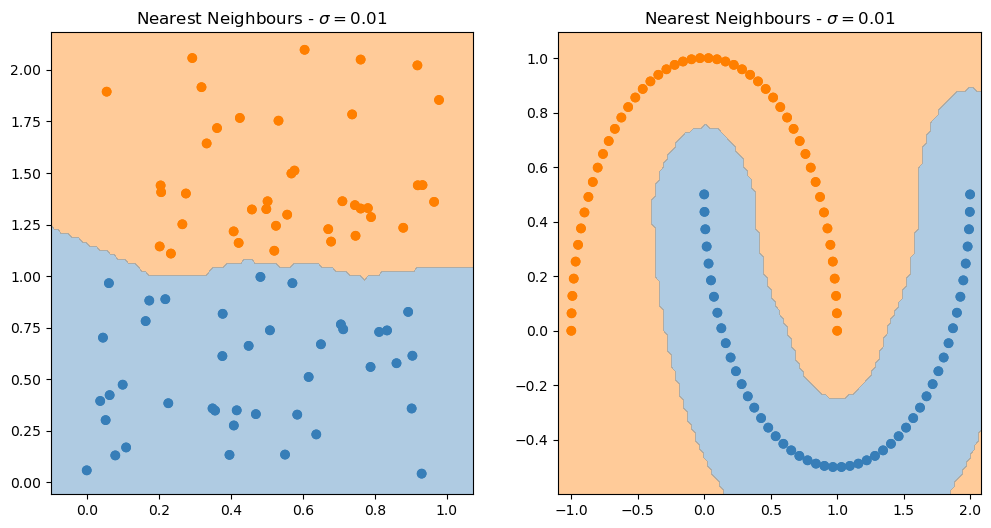

In [12]:
kernel_method(0.01)

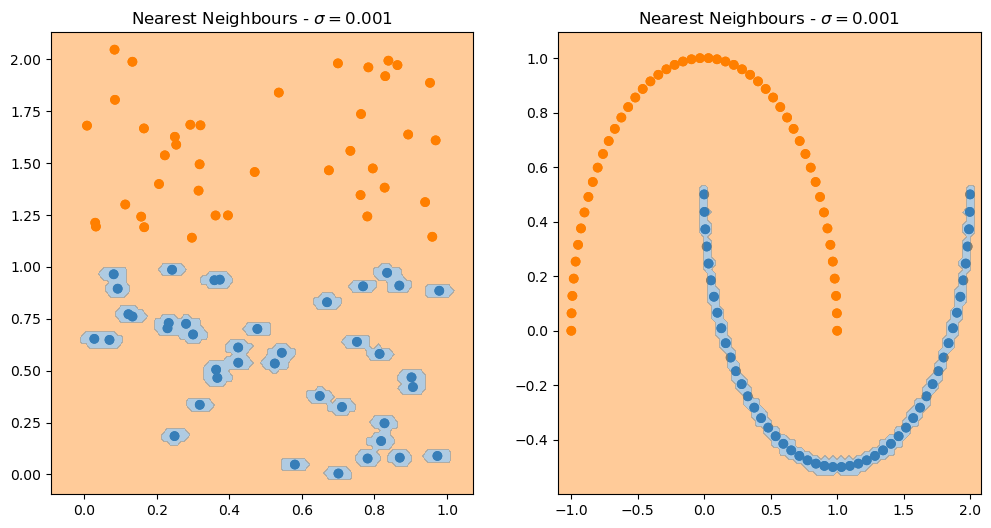

In [13]:
kernel_method(0.001)